In [3]:
import numpy as np
import matplotlib.pyplot as plt




In [2]:
def smr_eq(mass, temperature):
    '''This returns VO2 which is a proxy for SMR. 
        mass - the individuals mass in grams
        temperature - body temperture of the individual in celsius'''
    X1_mass=0.930
    X2_temp=0.044
    X3_const=-2.58
    log_smr = (X1_mass * np.log10(mass)) + (X2_temp * temperature) + X3_const
    smr = 10**log_smr
    return smr

def hourly_energy_expendeture(smr, activity_coeffcient):
    '''
    Our model for hourly energy expendature.
    Inputs:
        SMR - log(V02) which is in ml o^2 / hour
        Activity_coeffcient - multiplier to convert smr to amr. smr is the resting rate so a multiplier of 1 returns smr. A multiplier of >1 represents activity.
    Outputs:
        cals_burnt_per_hour - number of calories burnt by an individual.
    '''
    mlo2_to_joules = 19.874
    joules_to_cals = 2.39e-4
    hee = smr*activity_coeffcient
    joules_per_hour = hee*mlo2_to_joules
    cals_burnt_per_hour = joules_per_hour*joules_to_cals
    return cals_burnt_per_hour

def energy_intake(prey_mass, cal_per_gram_conversion, percent_digestion_cals):
    '''
    Amount of calories yielded from a prey agent.
    Inputs:
        prey_mass - mass of prey agent in grams
        cal_per_gram_conversion - conversion rate to get prey grams to calories
        percent_digestion_cals - percentage of calories lost to digestion.
    '''
    return float(prey_mass*cal_per_gram_conversion*percent_digestion_cals)

In [6]:
base_temp = 25 
time = range(0,8760)
body_size = 65
initial_energy_foraging = 500
initial_energy_resting = 500

cals_spent_resting = []
cals_spent_foraging = []
resting_energy = initial_energy_resting
foraging_energy = initial_energy_foraging


for t in time:
    smr = smr_eq(mass=body_size, temperature=base_temp)
    resting_energy_expendeture = hourly_energy_expendeture(smr=smr, activity_coeffcient=1)
    resting_energy -= resting_energy_expendeture 
    cals_spent_resting.append(resting_energy)

    foraging_energy_expendeture = hourly_energy_expendeture(smr=smr, activity_coeffcient=1.5)
    foraging_energy -= foraging_energy_expendeture 
    cals_spent_foraging.append(foraging_energy)


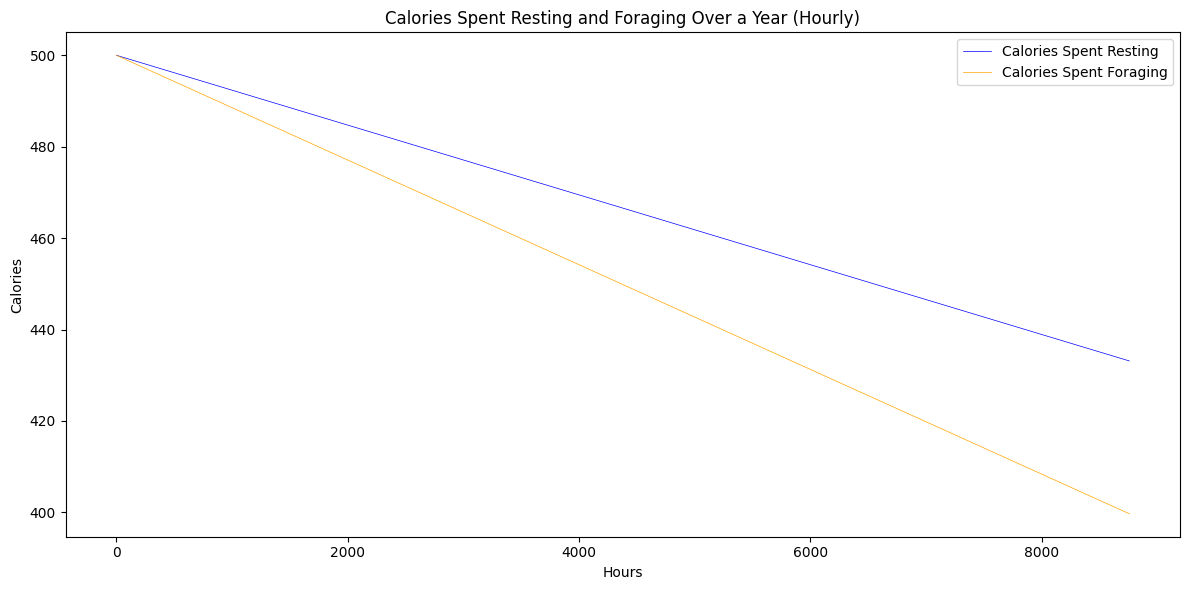

In [7]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time, cals_spent_resting, label="Calories Spent Resting", color='blue', linewidth=0.5)
plt.plot(time, cals_spent_foraging, label="Calories Spent Foraging", color='orange', linewidth=0.5)

# Labels and Title
plt.title("Calories Spent Resting and Foraging Over a Year (Hourly)")
plt.xlabel("Hours")
plt.ylabel("Calories")
plt.legend()
plt.tight_layout()
plt.show()